## Earthquakes in 1910-2017 Turkey Analysis

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [149]:
df=pd.read_csv("earthquake.csv")

In [150]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [151]:
df.tail()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0
24006,2.020000e+13,2017.04.05,12:25:25 AM,38.63,27.58,turkey,manisa,cavusoglu,NaN,NaN,9.0,3.5,0.0,3.4,3.5,0.0,0.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [153]:
df.drop("id",axis=1,inplace=True)

In [154]:
df.date=pd.to_datetime(df.date)
df["year"]=(df.date).dt.year
df["month"]=(df.date).dt.month
df["day"]=(df.date).dt.day
df.drop("date",axis=1,inplace=True)

In [155]:
df["hour"]=df.time.str[0:2]
df["minute"]=df.time.str[3:5]
df["second"]=df.time.str[6:8]
df["time_period"]=df.time.str[9:11]
df.drop("time",axis=1,inplace=True)

In [156]:
df.hour=df.hour.str.replace(":","")
df["hour"]=df["hour"].astype(int)
df.minute=df.minute.str.replace(":","")
df["minute"]=df["minute"].astype(int)
df.second=df.second.str.replace(":","")
df["second"]=df["second"].astype(int)

In [157]:
df=df[df["city"].notna()].reset_index(drop=True)

<AxesSubplot:>

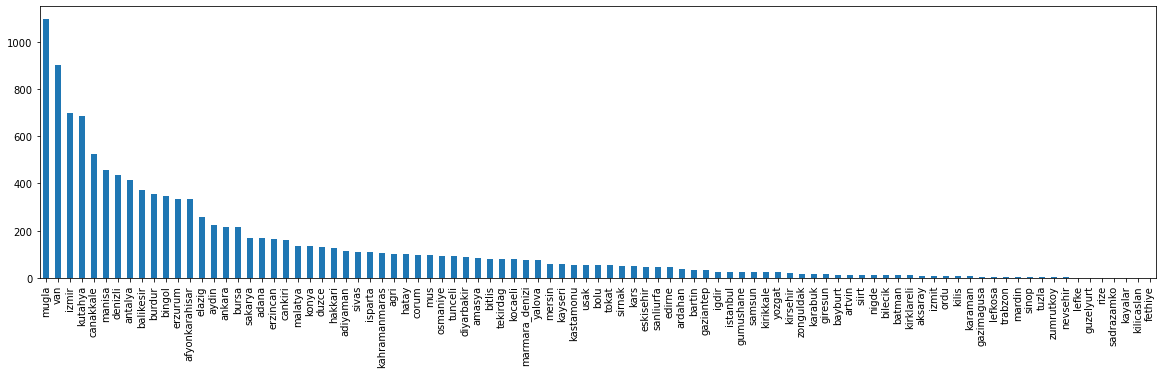

In [158]:
plt.figure(figsize=(20,5))
df.city.value_counts().plot.bar()

In [159]:
df['dist'].fillna(df['dist'].mean(),inplace=True)
df['direction'].fillna("north_west" ,inplace=True)
df['area'].fillna("gokova_korfezi" ,inplace=True)
df['mw'].fillna(df['mw'].mean(),inplace=True)

In [160]:
df.sample(5)

,lat,long,country,city,area,direction,dist,depth,xm,md,...,mw,ms,mb,year,month,day,hour,minute,second,time_period
6129,38.28,27.11,turkey,izmir,akcakoy_menderes,north_east,2.7,18.0,3.6,3.6,...,4.456108,0.0,0.0,1992,11,6,12,19,56,AM
2584,39.28,42.01,turkey,erzurum,akkavak_karacoban,north_east,1.4,60.0,4.9,4.7,...,4.900000,4.7,4.8,1960,8,22,12,42,24,AM
2079,36.98,28.84,turkey,mugla,cayhisar_koycegiz,west,1.3,2.0,4.2,0.0,...,4.456108,0.0,4.2,1991,1,25,12,3,52,AM
5319,38.93,26.96,turkey,izmir,candarli_dikili,south_east,2.4,12.0,3.5,3.5,...,4.456108,0.0,0.0,1999,6,12,12,36,42,AM
7569,38.04,27.94,turkey,izmir,egridere_tire,south_east,3.6,5.7,3.9,0.0,...,4.456108,0.0,0.0,2010,10,5,12,43,13,AM


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11754 entries, 0 to 11753
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        11754 non-null  int64  
 1   lat          11754 non-null  float64
 2   long         11754 non-null  float64
 3   country      11754 non-null  object 
 4   city         11754 non-null  object 
 5   area         11754 non-null  object 
 6   direction    11754 non-null  object 
 7   dist         11754 non-null  float64
 8   depth        11754 non-null  float64
 9   xm           11754 non-null  float64
 10  md           11754 non-null  float64
 11  richter      11754 non-null  float64
 12  mw           11754 non-null  float64
 13  ms           11754 non-null  float64
 14  mb           11754 non-null  float64
 15  year         11754 non-null  int64  
 16  month        11754 non-null  int64  
 17  day          11754 non-null  int64  
 18  hour         11754 non-null  int32  
 19  minu

In [138]:
df.describe()

,index,lat,long,dist,depth,xm,md,richter,mw,ms,mb,year,month,day,hour,minute,second
count,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000,11754.000000
mean,6975.607368,38.738455,33.051123,3.175015,12.861775,3.981274,2.239672,1.765892,4.456108,0.580483,1.398937,1993.431938,6.485282,16.137655,11.997192,29.516335,28.356474
std,5665.749118,1.325878,5.825023,4.362851,16.244126,0.551494,1.995038,2.070006,0.442912,1.565409,2.036030,19.081995,3.362472,8.880783,0.175721,17.389657,17.681014
min,0.000000,34.940000,25.540000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1911.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2938.250000,37.710000,28.260000,1.500000,5.000000,3.600000,0.000000,0.000000,4.456108,0.000000,0.000000,1982.000000,4.000000,8.000000,12.000000,15.000000,13.000000
50%,5876.500000,38.760000,30.395000,2.600000,8.500000,3.800000,3.500000,0.000000,4.456108,0.000000,0.000000,1999.000000,6.000000,17.000000,12.000000,30.000000,28.000000
75%,8814.750000,39.600000,38.657500,3.200000,13.000000,4.200000,3.800000,3.900000,4.456108,0.000000,3.700000,2008.000000,10.000000,24.000000,12.000000,45.000000,44.000000
max,24006.000000,46.350000,45.000000,95.400000,180.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000,2017.000000,12.000000,31.000000,12.000000,59.000000,59.000000


In [139]:
df.corr()

,index,lat,long,dist,depth,xm,md,richter,mw,ms,mb,year,month,day,hour,minute,second
index,1.000000,-0.161476,-0.168209,0.247847,0.040707,-0.056773,-0.160281,0.114592,-1.711733e-01,-0.103470,-0.109274,0.174186,0.023120,0.029441,-4.034975e-03,0.001313,0.018683
lat,-0.161476,1.000000,0.083559,0.068497,-0.132420,0.071693,0.069247,0.008109,4.995166e-02,0.074500,0.037117,-0.063134,0.022704,-0.009974,-1.632820e-02,-0.004098,-0.022184
long,-0.168209,0.083559,1.000000,0.026086,-0.014926,0.069475,-0.006173,0.053114,2.449745e-02,-0.004169,-0.071204,0.201397,0.050592,0.011906,-1.609900e-02,-0.008224,0.003656
dist,0.247847,0.068497,0.026086,1.000000,0.025033,0.004245,-0.003968,0.005820,-4.755997e-03,-0.008642,-0.000086,0.004914,-0.002780,-0.002418,6.165155e-03,0.004892,-0.014016
depth,0.040707,-0.132420,-0.014926,0.025033,1.000000,0.350812,0.137985,0.153091,1.728648e-01,0.408584,0.341939,-0.328206,-0.019516,-0.004827,-1.359668e-04,-0.001425,-0.009227
xm,-0.056773,0.071693,0.069475,0.004245,0.350812,1.000000,0.188446,0.482883,4.214997e-01,0.705683,0.598374,-0.522246,0.004387,0.014084,-1.508327e-03,-0.001889,-0.040440
md,-0.160281,0.069247,-0.006173,-0.003968,0.137985,0.188446,1.000000,-0.254506,3.110864e-01,0.373862,-0.097123,-0.353985,-0.058469,-0.022336,7.526040e-03,0.005343,-0.041102
richter,0.114592,0.008109,0.053114,0.005820,0.153091,0.482883,-0.254506,1.000000,8.839767e-02,0.452191,0.259757,-0.056544,0.041142,0.039728,-7.467831e-03,-0.015185,-0.003703
mw,-0.171173,0.049952,0.024497,-0.004756,0.172865,0.421500,0.311086,0.088398,1.000000e+00,0.409500,0.306134,-0.429739,-0.008553,0.002644,-3.529676e-15,-0.004705,-0.026425
ms,-0.103470,0.074500,-0.004169,-0.008642,0.408584,0.705683,0.373862,0.452191,4.095004e-01,1.000000,0.615652,-0.680373,-0.025882,0.016762,5.925206e-03,-0.003037,-0.035303


<AxesSubplot:>

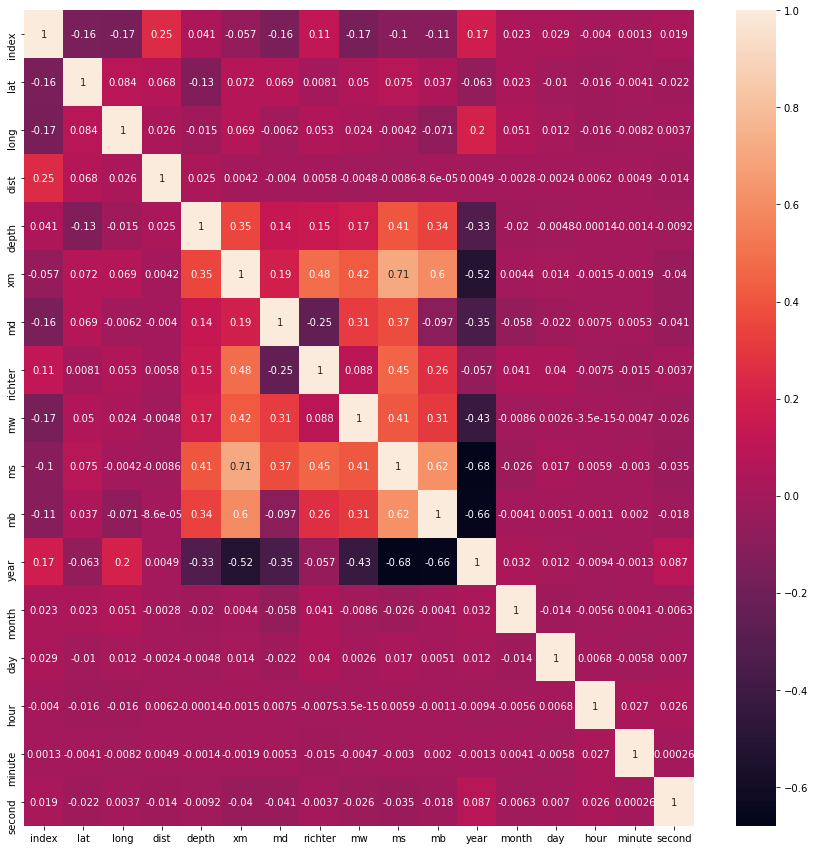

In [142]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

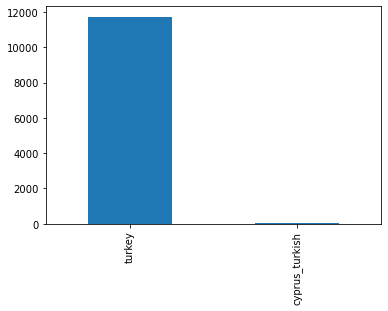

In [163]:
df.country.value_counts().plot.bar()

<AxesSubplot:xlabel='year'>

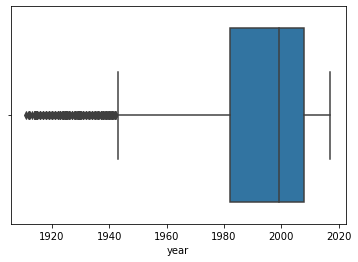

In [167]:
sns.boxplot(df.year)

<AxesSubplot:xlabel='month'>

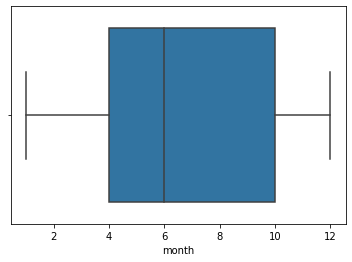

In [168]:
sns.boxplot(df.month)

<AxesSubplot:xlabel='day'>

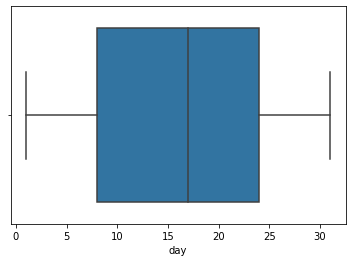

In [169]:
sns.boxplot(df.day)